### Описание проекта
Вы — маркетинговый аналитик развлекательного приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Ваша задача — разобраться в причинах и помочь компании выйти в плюс.

Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
* лог сервера с данными об их посещениях,
* выгрузка их покупок за этот период,
* рекламные расходы.

Вам предстоит изучить:
* откуда приходят пользователи и какими устройствами они пользуются,
* сколько стоит привлечение пользователей из различных рекламных каналов;
* сколько денег приносит каждый клиент,
* когда расходы на привлечение клиента окупаются,
* какие факторы мешают привлечению клиентов.

### Загрузите данные и подготовьте их к анализу

Загрузите данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/visits_info_short.csv);
- заказы: `/datasets/orders_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/orders_info_short.csv);
- расходы: `/datasets/costs_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/costs_info_short.csv).

Изучите данные и выполните предобработку. Есть ли в данных пропуски и дубликаты? Убедитесь, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратите внимание на столбцы с датой и временем.

In [1]:
import pandas as pd
from datetime import datetime, timedelta
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

In [2]:
# оборачиваем в конструкцию для запуска локально или с платформы Яндекса
try:
    visits, orders, costs = (
        pd.read_csv('https://code.s3.yandex.net/datasets/visits_info_short.csv'),
        pd.read_csv('https://code.s3.yandex.net/datasets/orders_info_short.csv'),
        pd.read_csv('https://code.s3.yandex.net/datasets/costs_info_short.csv'),
    )
except:
    visits, orders, costs = (
        pd.read_csv('/datasets/visits_info_short.csv'),
        pd.read_csv('/datasets/orders_info_short.csv'),
        pd.read_csv('/datasets/costs_info_short.csv'),
    )

In [3]:
# просмотр общей информации файла
visits.info()
print()
orders.info()
print()
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column 

In [4]:
print('Данные в visits \n', visits.head(),'\n')
print('Данные в orders \n', orders.head(), '\n')
print('Данные в costs \n', costs.head(), '\n')

Данные в visits 
         User Id         Region   Device  Channel        Session Start  \
0  981449118918  United States   iPhone  organic  2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic  2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic  2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop  2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic  2019-05-01 03:33:35   

           Session End  
0  2019-05-01 02:45:01  
1  2019-05-01 04:47:35  
2  2019-05-01 15:32:08  
3  2019-05-01 00:54:25  
4  2019-05-01 03:57:40   

Данные в orders 
         User Id             Event Dt  Revenue
0  188246423999  2019-05-01 23:09:52     4.99
1  174361394180  2019-05-01 12:24:04     4.99
2  529610067795  2019-05-01 11:34:04     4.99
3  319939546352  2019-05-01 15:34:40     4.99
4  366000285810  2019-05-01 13:59:51     4.99 

Данные в costs 
            dt   Channel  costs
0  2019-05-01  FaceBoom  113.3
1  2019-05-02  F

In [5]:
# приводим названия столбцов к нижнему регистру и убираем пробелы из названий
visits.columns = visits.columns.str.lower()
visits.columns = visits.columns.str.replace(' ', '_')
visits.info()
print()
orders.columns = orders.columns.str.lower()
orders.columns = orders.columns.str.replace(' ', '_')
orders.info()
print()
costs.columns = costs.columns.str.lower()
costs.columns = costs.columns.str.replace(' ', '_')
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        309901 non-null  int64 
 1   region         309901 non-null  object
 2   device         309901 non-null  object
 3   channel        309901 non-null  object
 4   session_start  309901 non-null  object
 5   session_end    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   40212 non-null  int64  
 1   event_dt  40212 non-null  object 
 2   revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column 

In [6]:
# проверяем данные на пропуски
print('Пропуски в visits \n', visits.isna().sum(),'\n')
print('Пропуски в orders \n', orders.isna().sum(),'\n')
print('Пропуски в costs \n', costs.isna().sum(),'\n')

Пропуски в visits 
 user_id          0
region           0
device           0
channel          0
session_start    0
session_end      0
dtype: int64 

Пропуски в orders 
 user_id     0
event_dt    0
revenue     0
dtype: int64 

Пропуски в costs 
 dt         0
channel    0
costs      0
dtype: int64 



In [7]:
# проверяем данные на дубликаты
print('Количество дубликатов в visits \n', visits.duplicated().sum(),'\n')
print('Количество дубликатов в orders \n', orders.duplicated().sum(),'\n')
print('Количество дубликатов в costs \n', costs.duplicated().sum(),'\n')

Количество дубликатов в visits 
 0 

Количество дубликатов в orders 
 0 

Количество дубликатов в costs 
 0 



In [8]:
# преобразовываем даты в тип данных дата
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

In [9]:
# проверяем преобразование форматов
visits.info()
print()
orders.info()
print()
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942

**Вывод:** 
1. Названия столбов были привидены к нижнему регистру и заменены пробелы на нижнее подчеркивание;
2. Проверил данные на пропуски значений, пропусков не обнаружено;
3. Проверил данные на явные дубликаты, дубликатов не обноружено;
4. Значения дат во всех датафреймах перевел в тип дататайм.


### Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

#### Функции для вычисления значений метрик

##### Функция для создания пользовательских профилей

In [10]:
def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

##### Функция для расчёта удержания

In [11]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

##### Функция для расчёта конверсии

In [12]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

##### Функция для расчёта LTV и ROI

In [13]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

#### Функции для построения графиков

##### Функция для сглаживания фрейма

In [14]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

##### Функция для визуализации удержания

In [15]:
def plot_retention(retention, retention_history, horizon, window=14):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

##### Функция для визуализации конверсии

In [16]:
def plot_conversion(conversion, conversion_history, horizon, window=14):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

##### Функция для визуализации LTV и ROI

In [17]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=14):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

#### Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.

In [18]:
# создаем профили пользователей
profiles = get_profiles(visits, orders, costs)

profiles.head(5)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [19]:
# определяем минимальную и максимальную даты привлечения пользователей
min_analysis_date = profiles['dt'].min()
observation_date = profiles['dt'].max()
print('Минимальная дата привлечения -', min_analysis_date)
print('Максимальная дата привлечения -', observation_date)

Минимальная дата привлечения - 2019-05-01
Максимальная дата привлечения - 2019-10-27


**Вывод:** Создал профили пользователей. Определил Минимальную и максимальную даты привлечения клиентов, и они совпали с датами из задания.

#### Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.

In [20]:
region_users = (profiles.groupby('region')
                .agg({'user_id': 'nunique', 'payer': 'sum'})
                .sort_values(by='payer', ascending=False)
                .rename(columns={'user_id': 'users'}))
region_users['share_payers'] =  region_users['payer'] / region_users['users'] * 100
print(region_users)

                users  payer  share_payers
region                                    
United States  100002   6902      6.901862
UK              17575    700      3.982930
France          17450    663      3.799427
Germany         14981    616      4.111875


**Вывод:** Построил таблицу отражающую количество пользователей и долю платящих из каждой страны. Регион United States ледирует по общему количеству пользователей, по количеству платящих пользователей и по доле платящих пользователей.

#### Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.

In [21]:
# cоздаем функция для формирования таблицы с нужными параметрами
def payer_ratio(profiles, agg_feature):
    profile_featured = profiles.pivot_table(
        index=agg_feature,
        values='payer',
        aggfunc=['count', 'sum']
    ).reset_index()
    profile_featured.columns = [agg_feature,'total_users', 'payment_count']
    profile_featured['payment_part, %'] = (
        profile_featured['payment_count'].div(profile_featured['total_users'], axis=0).round(3) * 100
    )
    profile_featured.sort_values(by='payment_part, %', ascending=False, inplace=True, ignore_index=True)
    return profile_featured

In [22]:
payer_ratio(profiles,'device')

,device,total_users,payment_count,"payment_part, %"
0,Mac,30042,1912,6.4
1,iPhone,54479,3382,6.2
2,Android,35032,2050,5.9
3,PC,30455,1537,5.0


**Вывод:** Построил таблицу отражающую количество пользователей и долю платящих для каждого устройства. Больше всего пользователей и платящих пользователей у устройства iPhone. А вот самая лучшая доля платящих клиентов у устройства Mac.

#### Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

In [23]:
payer_ratio(profiles,'channel')

,channel,total_users,payment_count,"payment_part, %"
0,FaceBoom,29144,3557,12.2
1,AdNonSense,3880,440,11.3
2,lambdaMediaAds,2149,225,10.5
3,TipTop,19561,1878,9.6
4,RocketSuperAds,4448,352,7.9
5,WahooNetBanner,8553,453,5.3
6,YRabbit,4312,165,3.8
7,MediaTornado,4364,156,3.6
8,LeapBob,8553,262,3.1
9,OppleCreativeMedia,8605,233,2.7


**Вывод:** Построил таблицу отражающую количество пользователей и долю платящих для каждого канала привлечения. Больше всего пользователей, платящих пользователей и доля платящих пользователей у канала FaceBoom.

### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

#### Посчитайте общую сумму расходов на маркетинг.

In [24]:
all_costs = costs.agg({'costs': 'sum'})
all_costs

costs    105497.3
dtype: float64

**Вывод:** Общая сумма рекланых расходов составляет 105497.3

#### Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.

In [25]:
channel_costs = (costs.groupby('channel', as_index=False)
                .agg({'costs': 'sum'})
                .sort_values(by='costs', ascending=False)).reset_index(drop=True)
channel_costs['share_costs'] = (channel_costs['costs'] / channel_costs['costs'].sum()).round(3) * 100
channel_costs

,channel,costs,share_costs
0,TipTop,54751.30,51.9
1,FaceBoom,32445.60,30.8
2,WahooNetBanner,5151.00,4.9
3,AdNonSense,3911.25,3.7
4,OppleCreativeMedia,2151.25,2.0
5,RocketSuperAds,1833.00,1.7
6,LeapBob,1797.60,1.7
7,lambdaMediaAds,1557.60,1.5
8,MediaTornado,954.48,0.9
9,YRabbit,944.22,0.9


**Вывод:** Самым затратным рекламным источником является TipTop. При половине всех рекламных расходов на данный канал, доля платящих клиентов всего лишь 4 из всех источников. Можно уже сказать что данный источник является не эффективным.

#### Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.

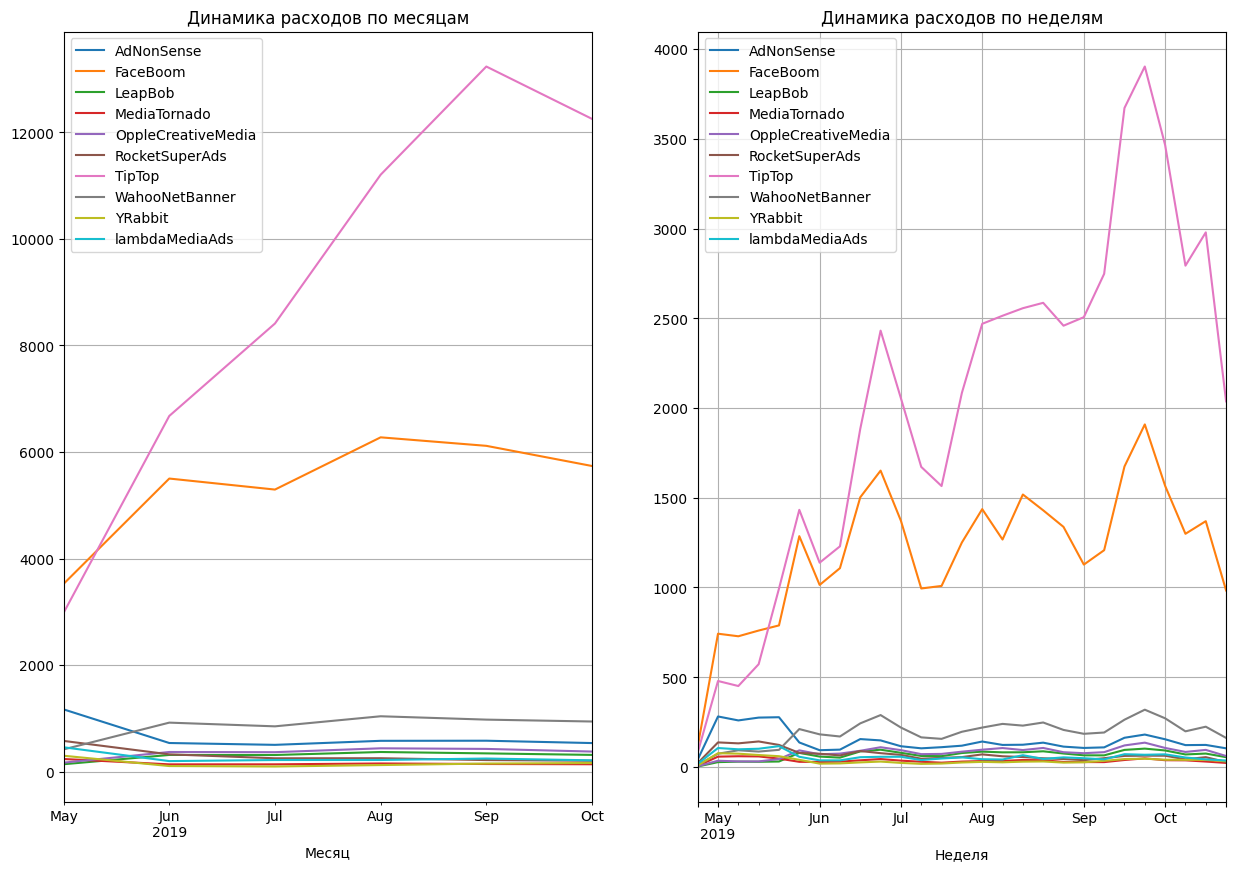

In [26]:
# добавляем месяц и неделю
costs['month'] = costs['dt'].astype('datetime64[M]')
costs['week'] = costs['dt'].astype('datetime64[W]')

# строим график с разбивкой по месяцам и неделям
plt.figure(figsize=(15, 10))
ax1 = plt.subplot(1, 2, 1)
(costs
 .pivot_table(index='month', columns='channel', values='costs', aggfunc='sum')
 .plot(grid=True, ax=ax1))
plt.legend()
plt.xlabel('Месяц')
plt.title('Динамика расходов по месяцам')

ax2 = plt.subplot(1, 2, 2)
(costs
 .pivot_table(index='week', columns='channel', values='costs', aggfunc='sum')
 .plot(grid=True, ax=ax2))
plt.legend()
plt.xlabel('Неделя')
plt.title('Динамика расходов по неделям')
plt.show()

**Вывод:** Самую большую динамику расходов показывают 2 канала TipTop и FaceBoom. У остальных каналов расходы распределены равномерно в течениии всего промежутка времени.

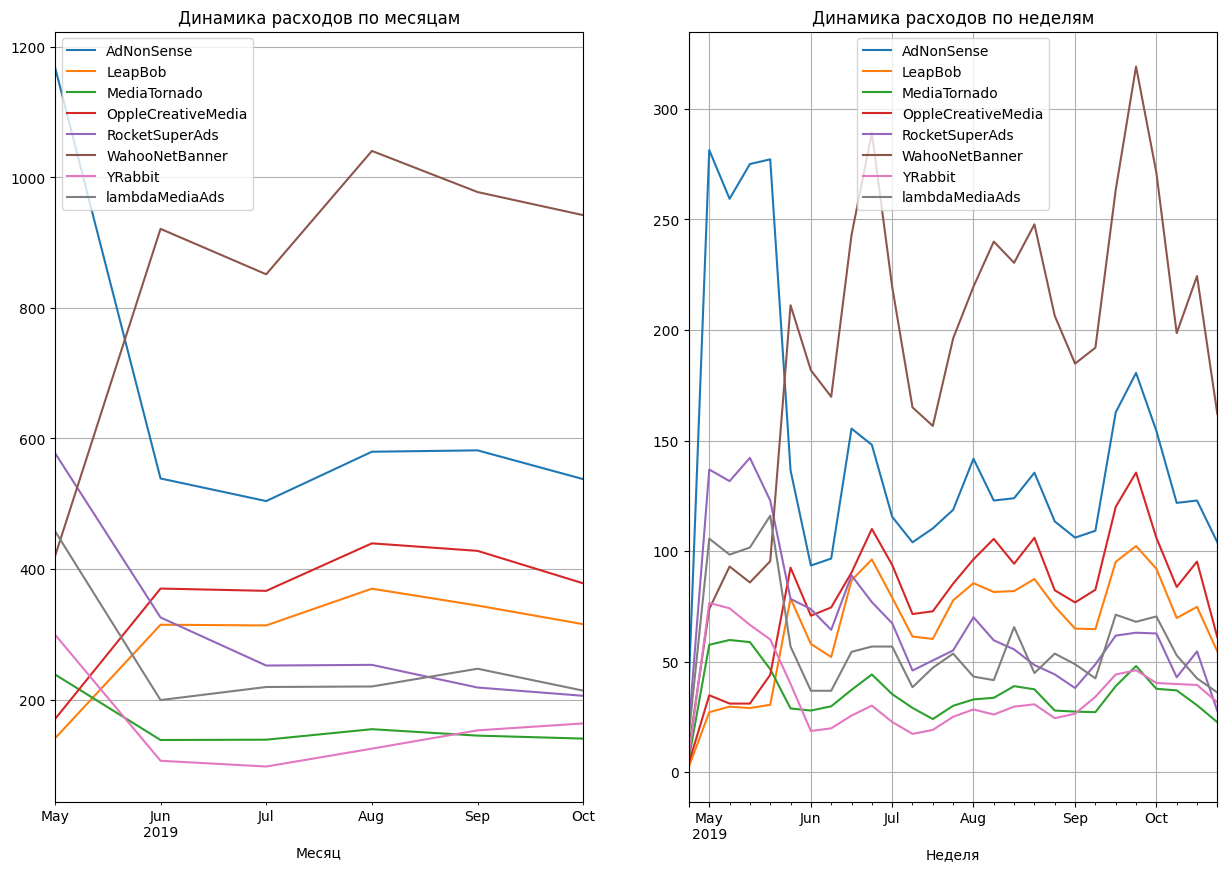

In [27]:
# строим график с разбивкой по месяцам и неделям без 2-х каналов TipTop и FaceBoom.
plt.figure(figsize=(15, 10))
ax1 = plt.subplot(1, 2, 1)
(costs
 .query('channel != "TipTop" & channel != "FaceBoom"')
 .pivot_table(index='month', columns='channel', values='costs', aggfunc='sum')
 .plot(grid=True, ax=ax1))
plt.legend()
plt.xlabel('Месяц')
plt.title('Динамика расходов по месяцам')

ax2 = plt.subplot(1, 2, 2)
(costs
 .query('channel != "TipTop" & channel != "FaceBoom"')
 .pivot_table(index='week', columns='channel', values='costs', aggfunc='sum')
 .plot(grid=True, ax=ax2))
plt.legend()
plt.xlabel('Неделя')
plt.title('Динамика расходов по неделям')
plt.show()

**Вывод:** Сделав динамику расходов без 2-х каналов TipTop и FaceBoom, видим что так же увеличились расходы по каналу WahooNetBanner

#### Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

In [28]:
report = (profiles.query('channel != "organic"').groupby('channel')
          .agg({'acquisition_cost': 'mean'})
          .sort_values(by='acquisition_cost', ascending=False))
# Добавляем разницу от общего среднего значения
report['dif_mean'] = report['acquisition_cost'] - report['acquisition_cost'].mean()
report = report.round(1)
print(report,'\n')
print('Среднее стоимость привлечения по всем источникам:',report['acquisition_cost'].mean())

                    acquisition_cost  dif_mean
channel                                       
TipTop                           2.8       2.0
FaceBoom                         1.1       0.4
AdNonSense                       1.0       0.3
lambdaMediaAds                   0.7      -0.0
WahooNetBanner                   0.6      -0.2
RocketSuperAds                   0.4      -0.3
OppleCreativeMedia               0.2      -0.5
YRabbit                          0.2      -0.5
MediaTornado                     0.2      -0.5
LeapBob                          0.2      -0.5 

Среднее стоимость привлечения по всем источникам: 0.74


**Вывод:** Самая большая средняя стоимость привлечения у канала TipTop

### Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

In [29]:
# указываем дату наблюдения и горизонт дат
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14
# убираем органических пользователей из анализа
profiles = profiles.query('channel != "organic"')

Из анализа исключили органических пользователей, так как нам важно понять эффективность затрат.

#### Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.

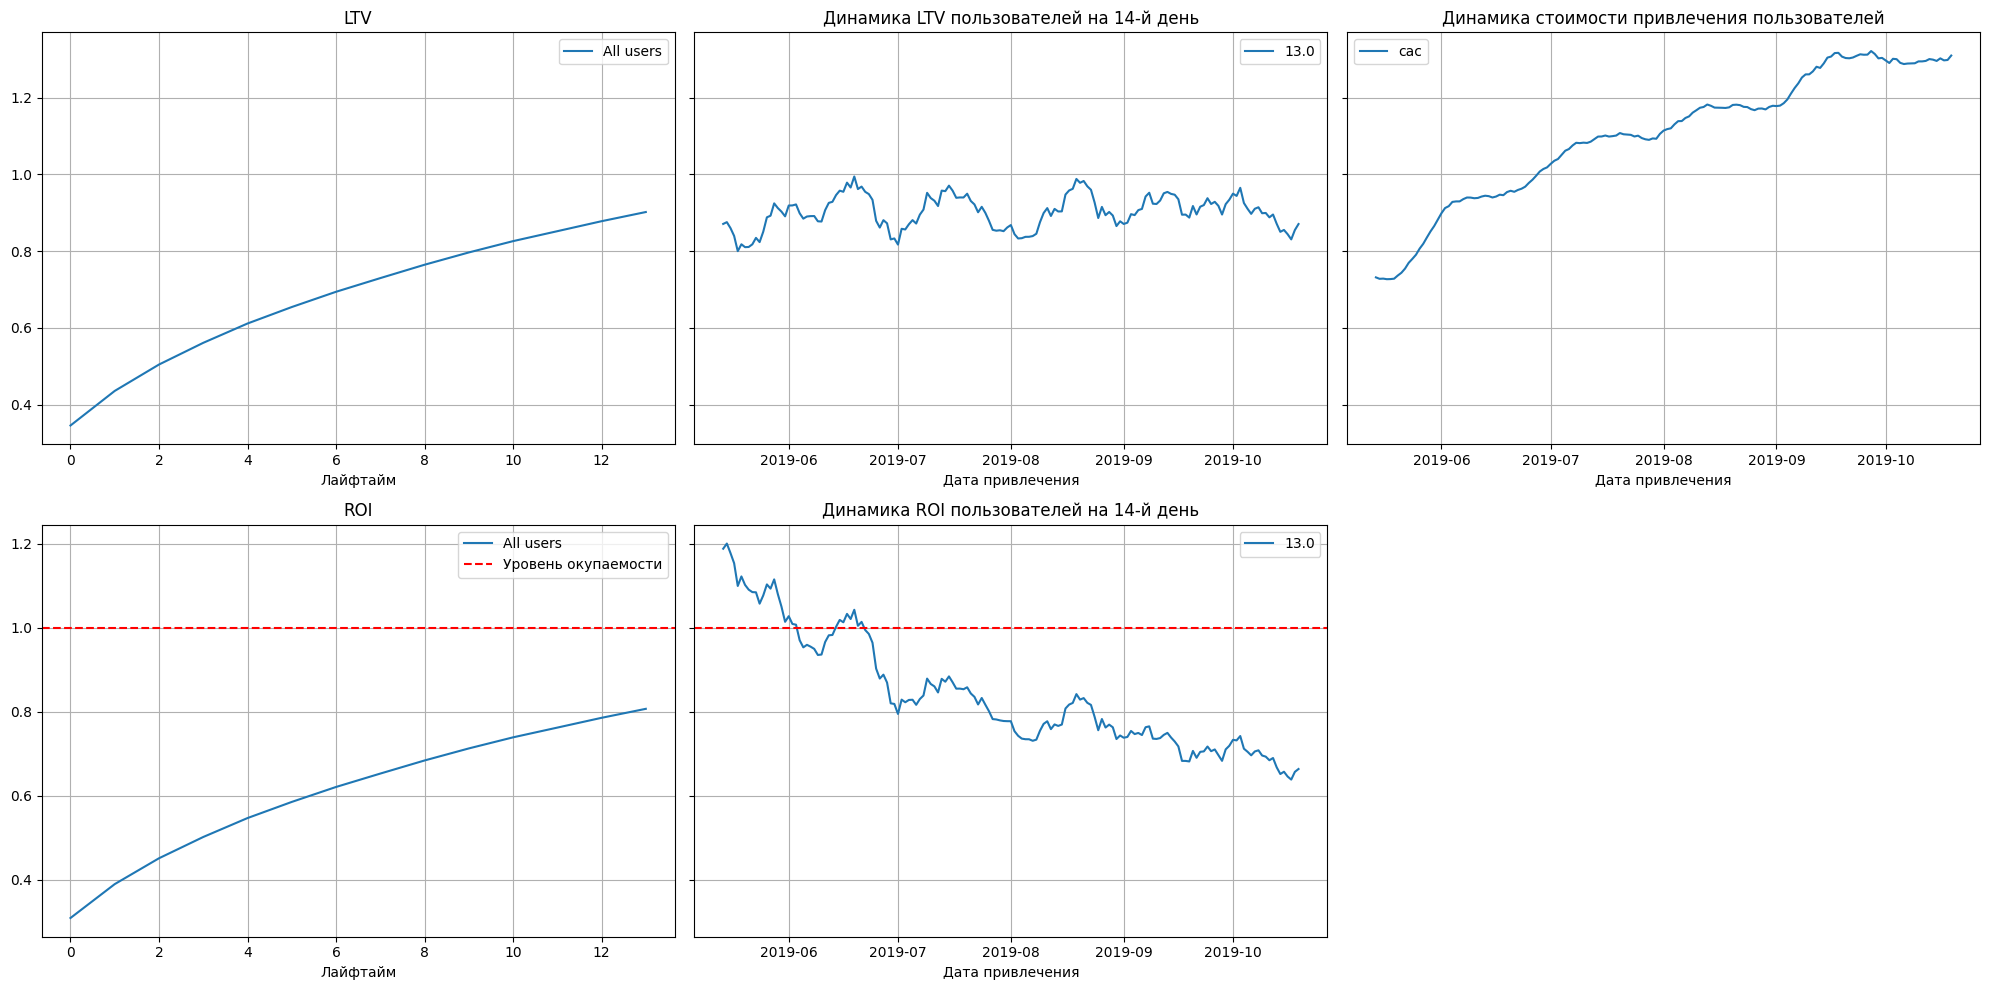

In [30]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

**Вывод:** 
1. LTV пользователей стабильно растет с течением времени, это хорошо.
2. LTV пользователей на 14-й день колеблется от 0,8 до 1.
3. Стоимость привлечения в динамике растет.
4. Окупаемость в целом по всем пользователям отсутствует.
5. На начальном этапе была окупаемость инсвестиций, но с ростом стоимости привлечения окупаемость ушла в минус.

#### Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.

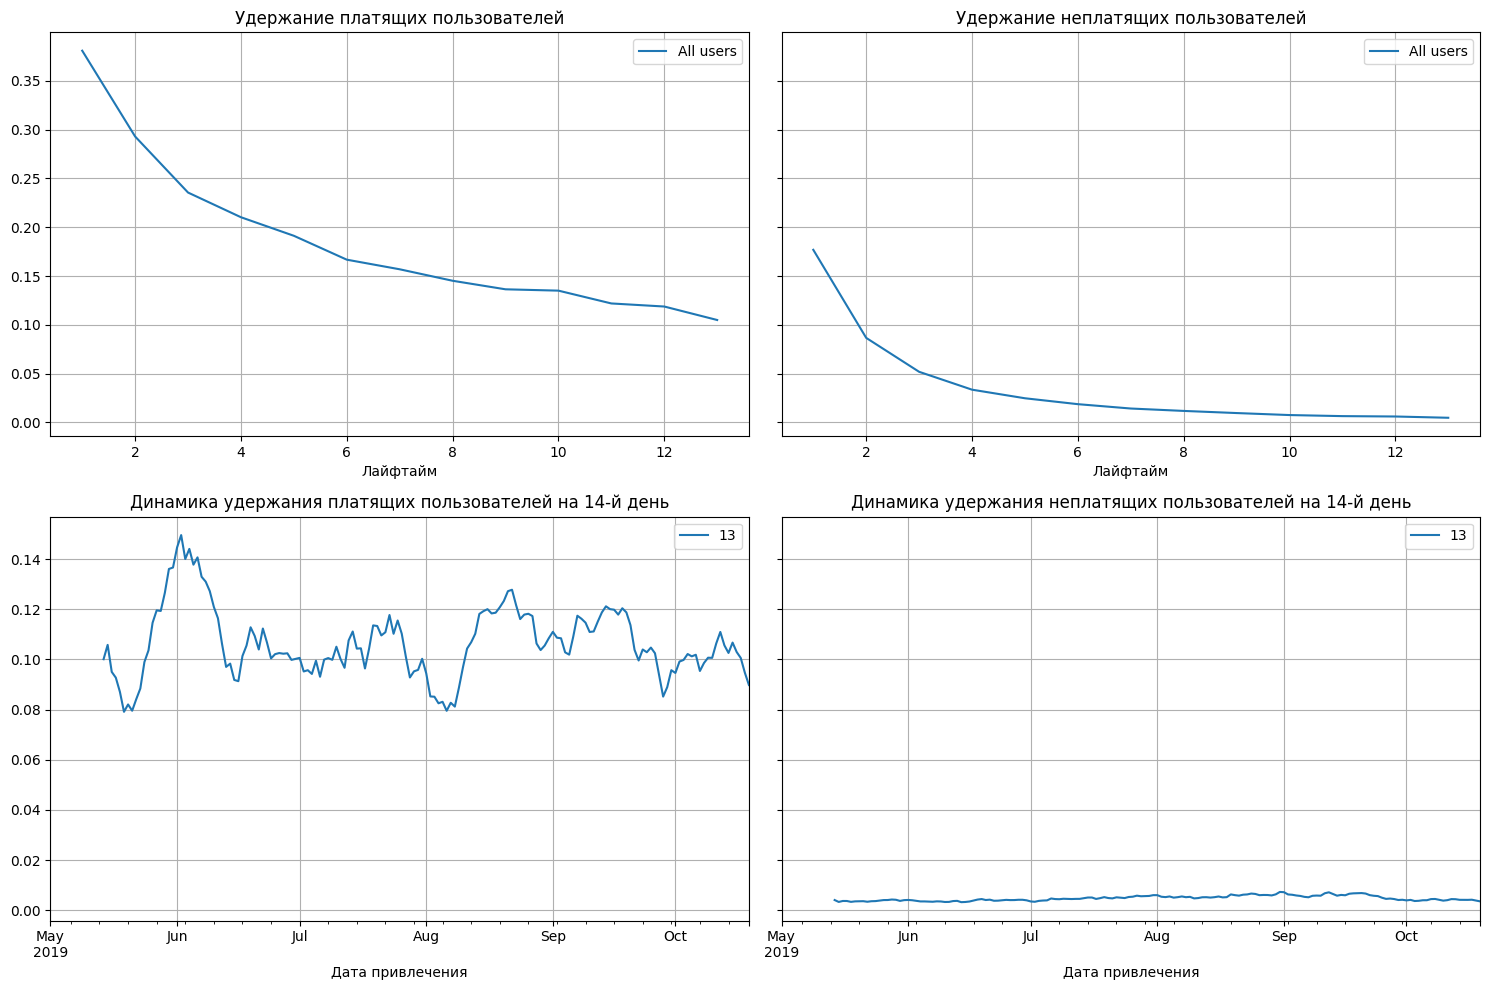

In [31]:
# строим графики с удержанием пользователей
retention_raw, retention_grouped, retention_in_time = get_retention(
    profiles, visits, observation_date, horizon_days
)
plot_retention(retention_grouped, retention_in_time, horizon_days)

**Вывод:**
1. Удержание платящих клиентов значительно выше чем не платящих, что вполне стандартно.
2. У не платящих клиентов динамика удержание на 14-й день практически равна нулю, у платных клеблется от 0,06 до 0,175.

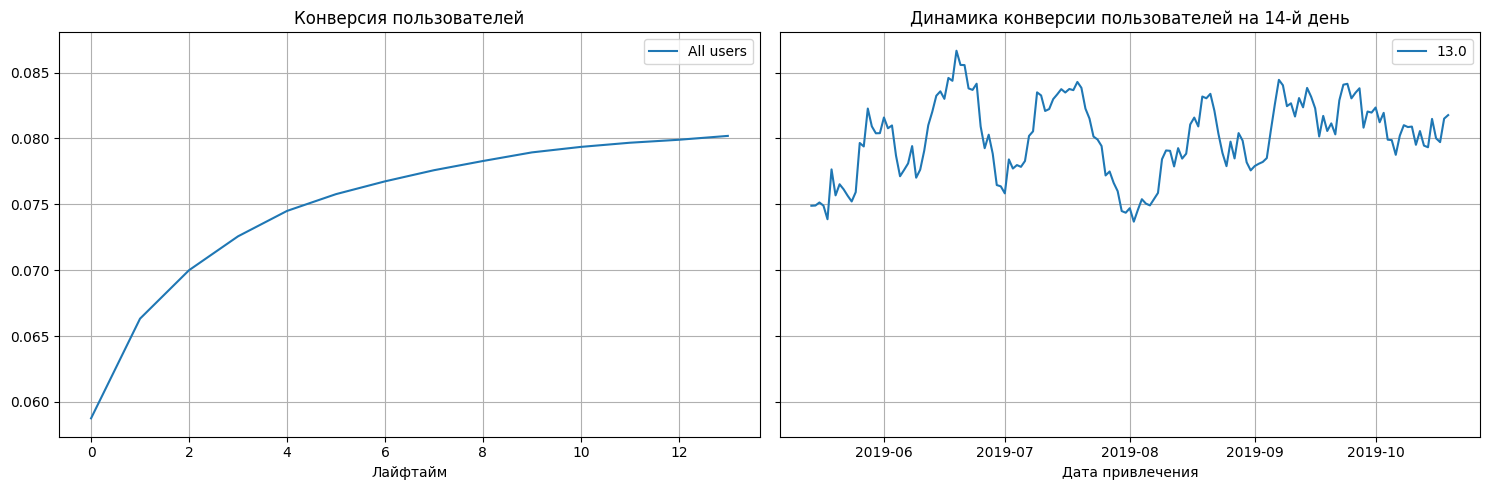

In [32]:
# строим графики с конверсией пользователей
conversion_raw, conversion_grouped, conversion_in_time = get_conversion(
    profiles, orders, observation_date, horizon_days
)
plot_conversion(conversion_grouped, conversion_in_time, horizon_days)

**Вывод:**
1. Конверсия пользователей планомерно растет со временем, что вполне естественно.
2. Динамика конверсии на 14-й день колеблиться от 0,066 до 0,095 в зависимости от даты привлечения.

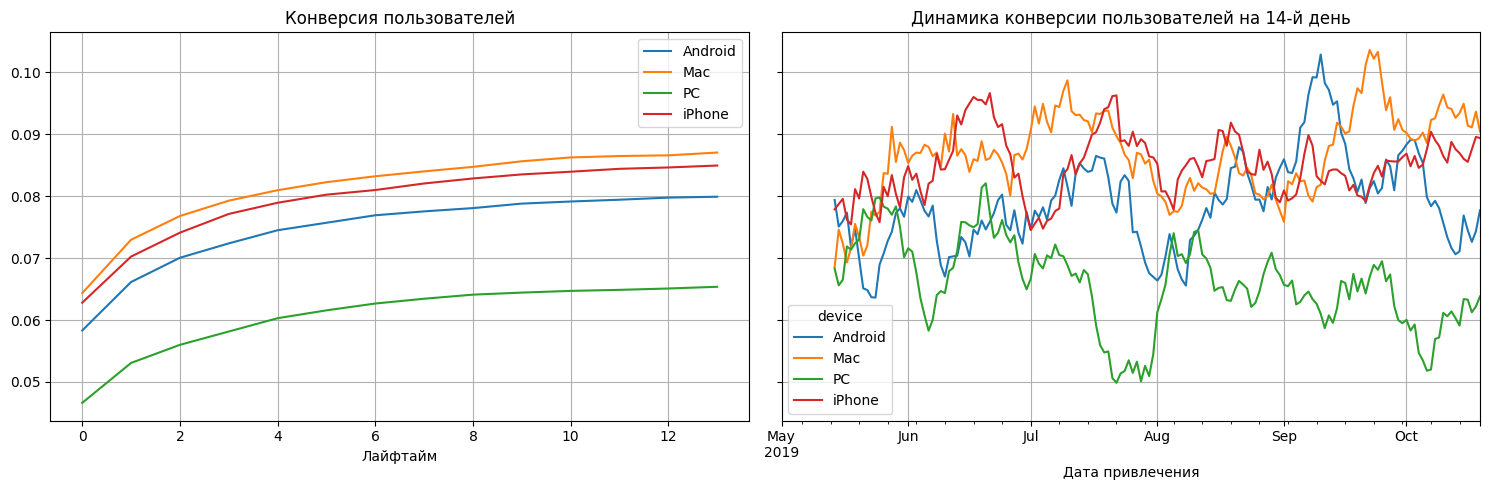

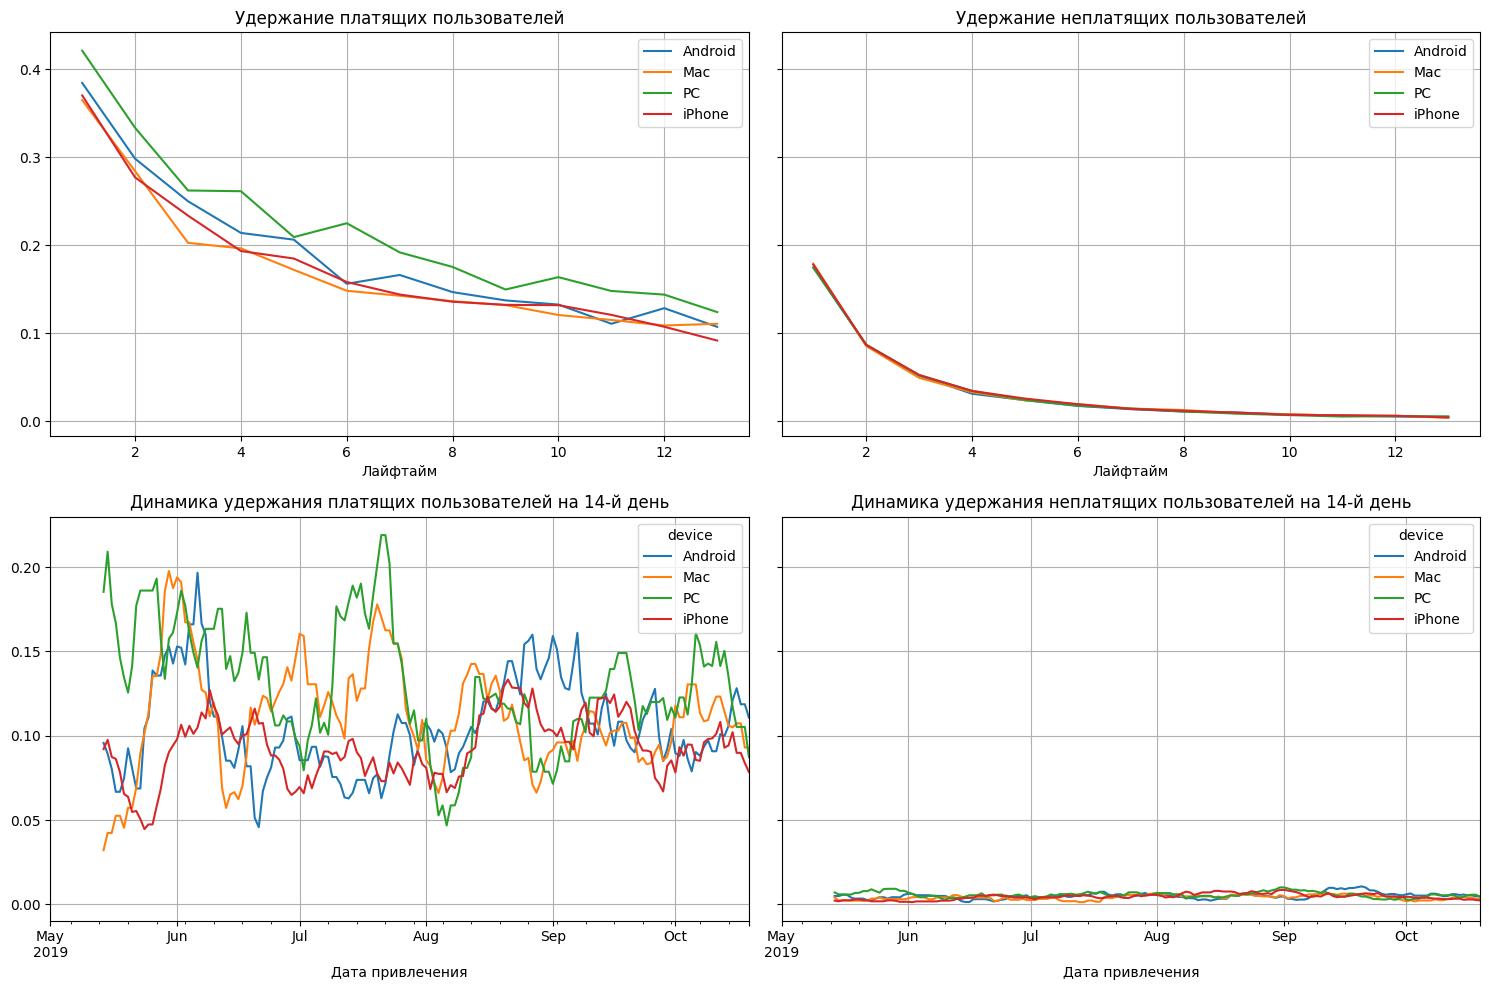

In [33]:
# строим графики с конверсией по устройствам
conversion_raw, conversion_grouped, conversion_in_time = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['device']
)
plot_conversion(conversion_grouped, conversion_in_time, horizon_days)

# строим графики с удержанием по устройствам
retention_raw, retention_grouped, retention_in_time = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['device']
)
plot_retention(retention_grouped, retention_in_time, horizon_days)

**Вывод:** Построив графики удержания и конверсии по устройствам, заметил что платформа PC имеея самую низкую конверсию по отношению к остальным, при этом имеет самое большое удержание платящих клиентов. Это определенно точка роста.

#### Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

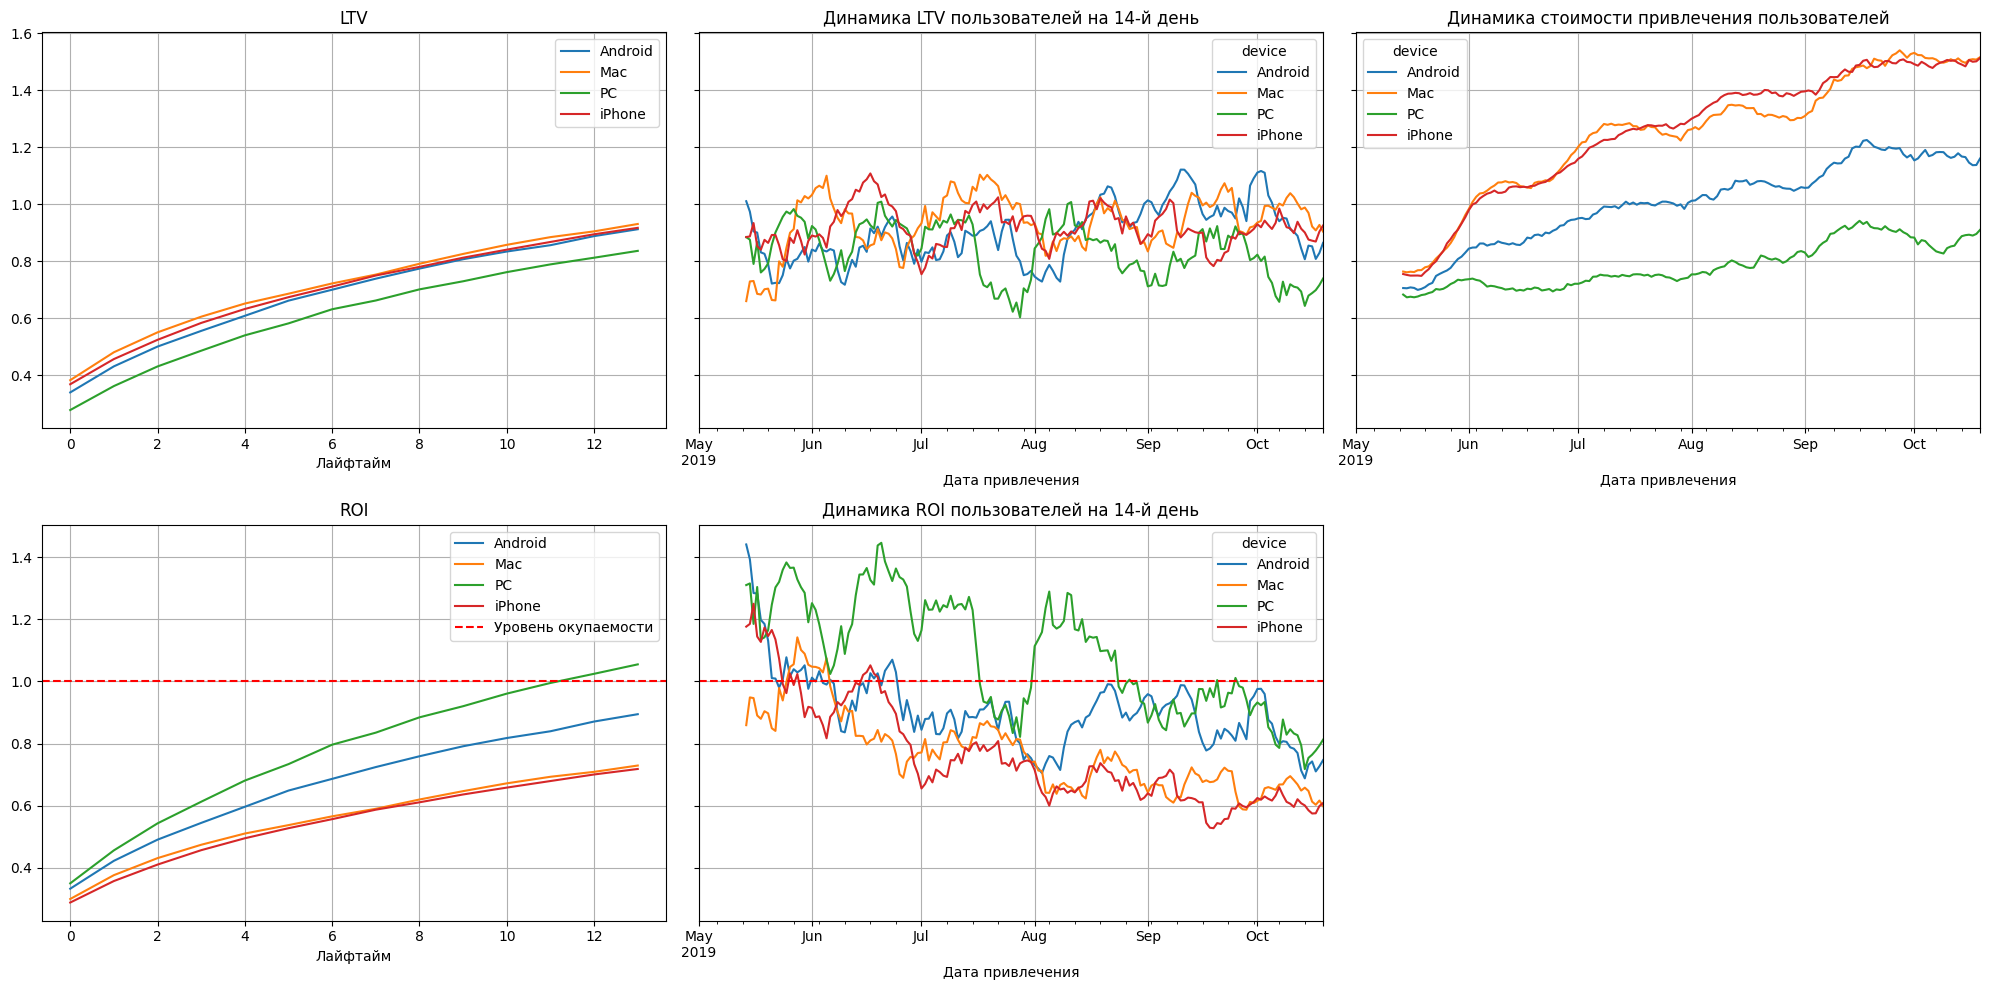

In [34]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=['device']
)
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

**Вывод:**
Из графиков видно, что из устройств окупается только устройство PC, и то только к концу лайфтайма. Так же стот отметить, что платформа PC окупалась на 14-й день до Сентября, так как с Сентября значительно увеличилась стоимость привлечения, и окупаемость стала отрицательной.

Так же видим отрицательную динамику по устройствам Mac и iPhone, при том, что по ним реклама не окупалась изначально, данные устройства продалжают показывать отрицательную динамику, что плохо сказывается на окупаемость.

#### Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

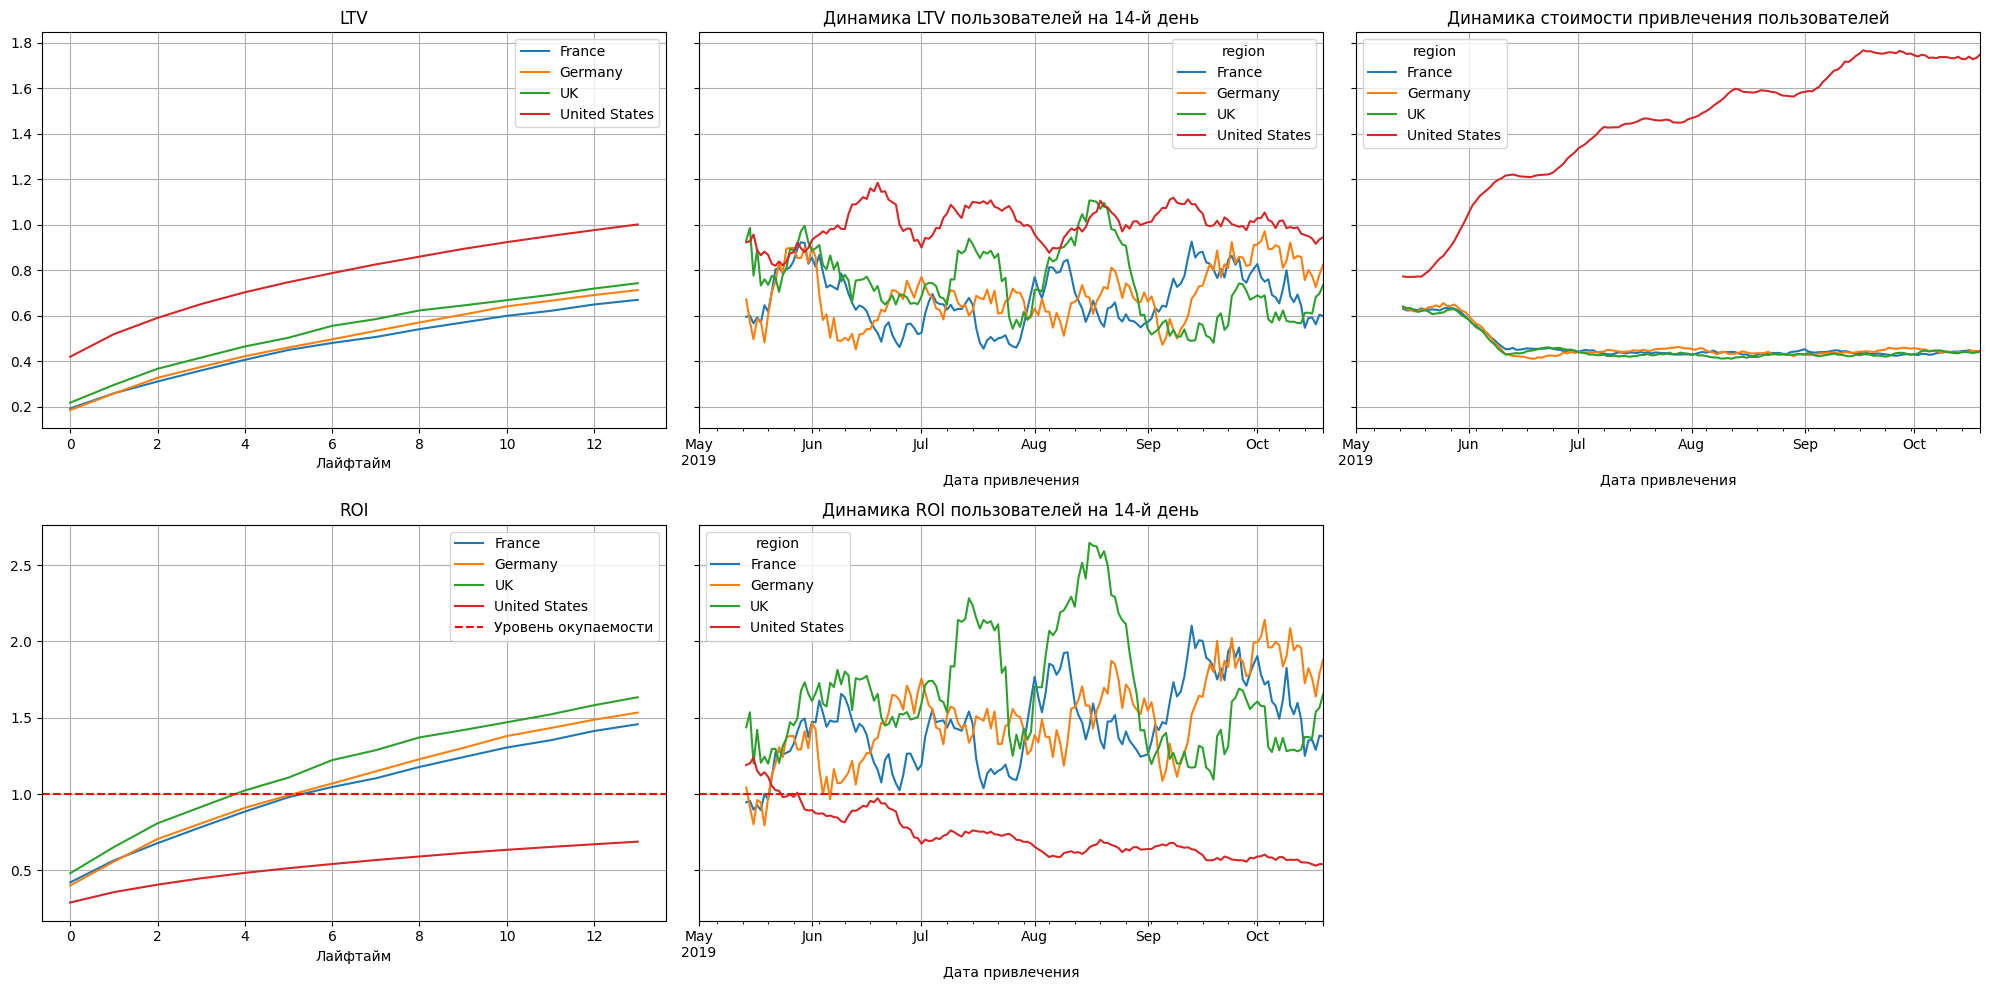

In [35]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=['region']
)
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

**Вывод:**
Если посмотреть разбивку по странам, то видно что единственная страна где не окупается реклама United States, это связано с резко возросшим CAC. Остальные страны к концу лайфтайма выходят на окупаемость, в том числе благодаря снижению CAC с Июля.

#### Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

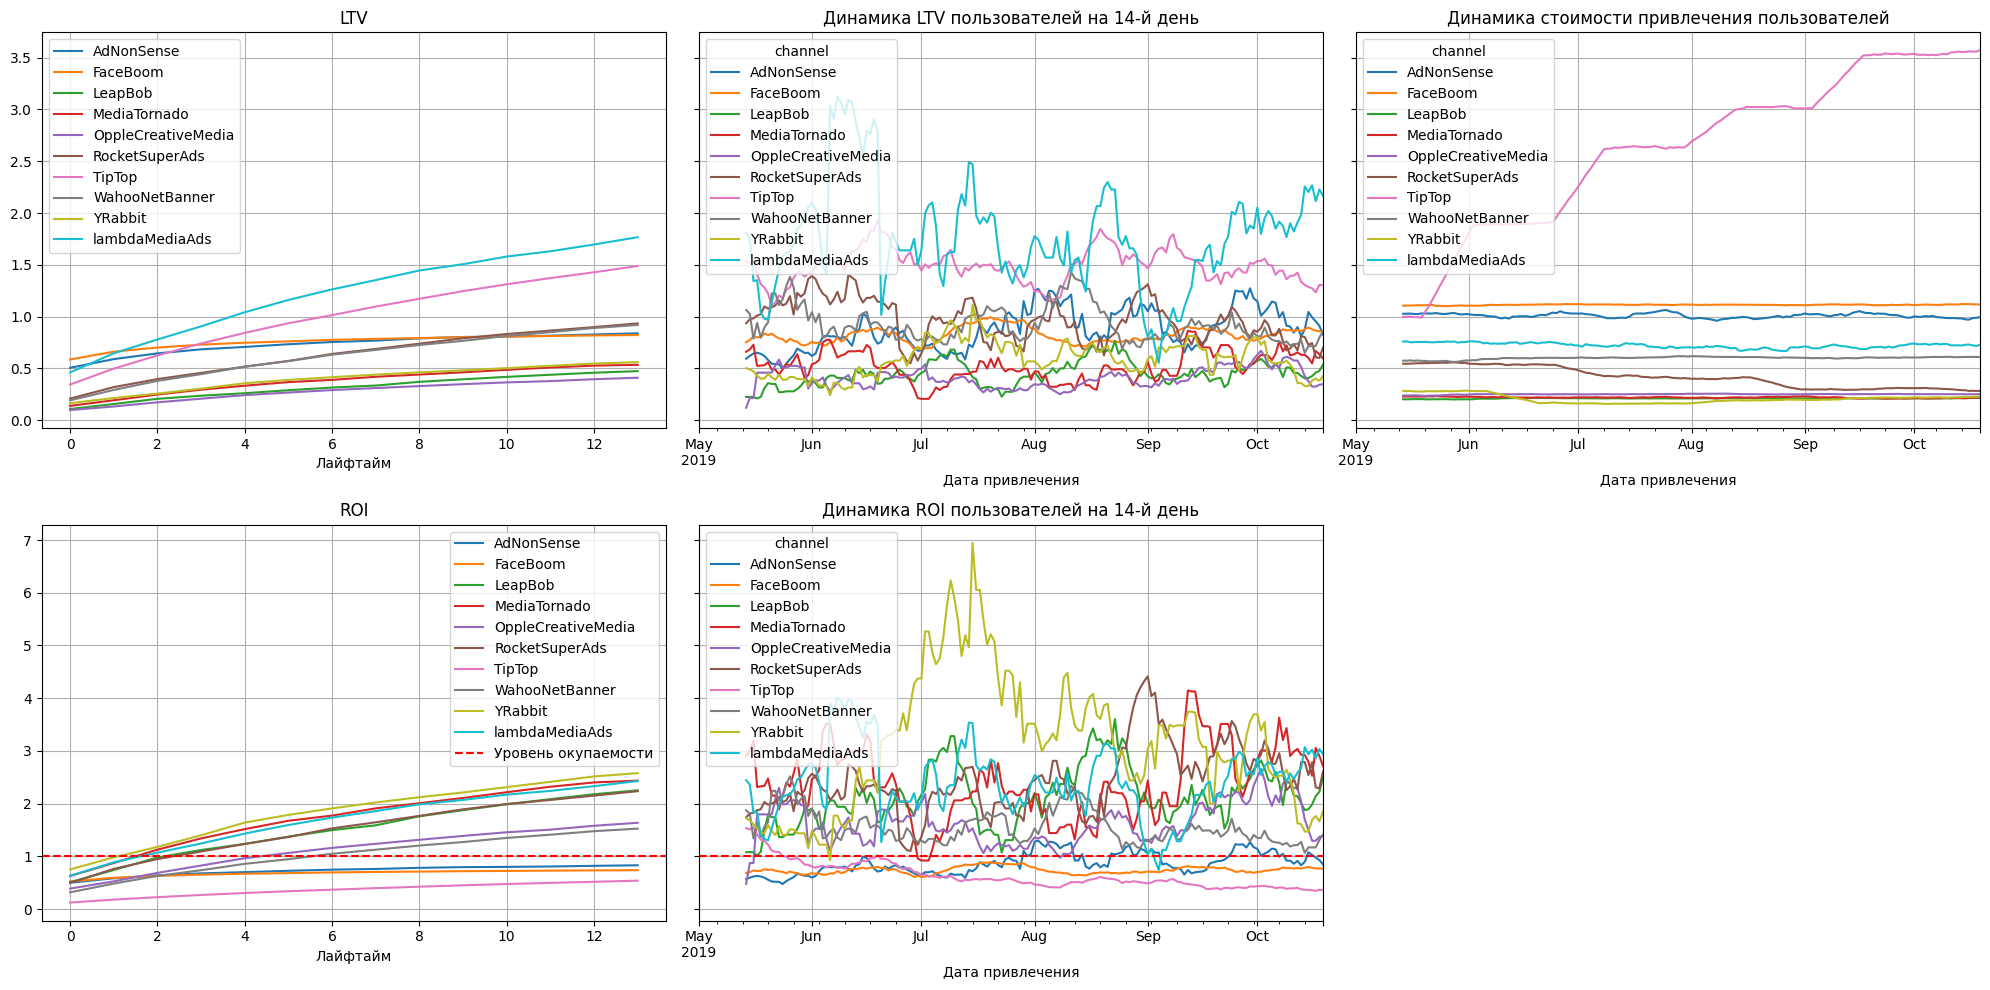

In [36]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=['channel']
)
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

**Вывод:**
Не окупаемыми источниками рекламы стали TipTop, FaceBoom, AdNonSense.Если FaceBoom, AdNonSense стабильно не окупаемые на протяжении всего периода, то TipTop имеет отрицательную динамику по окупаемости за счет резкого увеличения CAC на всем периоде.

Остальные источники выходят на окупаемость к 14 дню. Отдельно нужно отметить источник YRabbit, который имеет самую большую окупаемость рекламы, в том числе за счет скачка окупаемости с Июля по Август, и небольшого сокращения CAC с середины Июня.


#### Ответьте на такие вопросы:
##### Окупается ли реклама, направленная на привлечение пользователей в целом?
В целом реклама не окупается, причем имеется негативная тенденция по ухудшению динамики ROI на 14-й день.
##### Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
Устройства которые оказывают негативное влияние это iPhone и Mac. Страны оказывающие негативное влияние - United States. Каналы оказывающие негативное влияние FaceBoom, AdNonSense и особенно TipTop.
##### Чем могут быть вызваны проблемы окупаемости?
В разком увеличении стоимости привлечения пользователей.

In [37]:
profiles = profiles.query('region != "United States"')

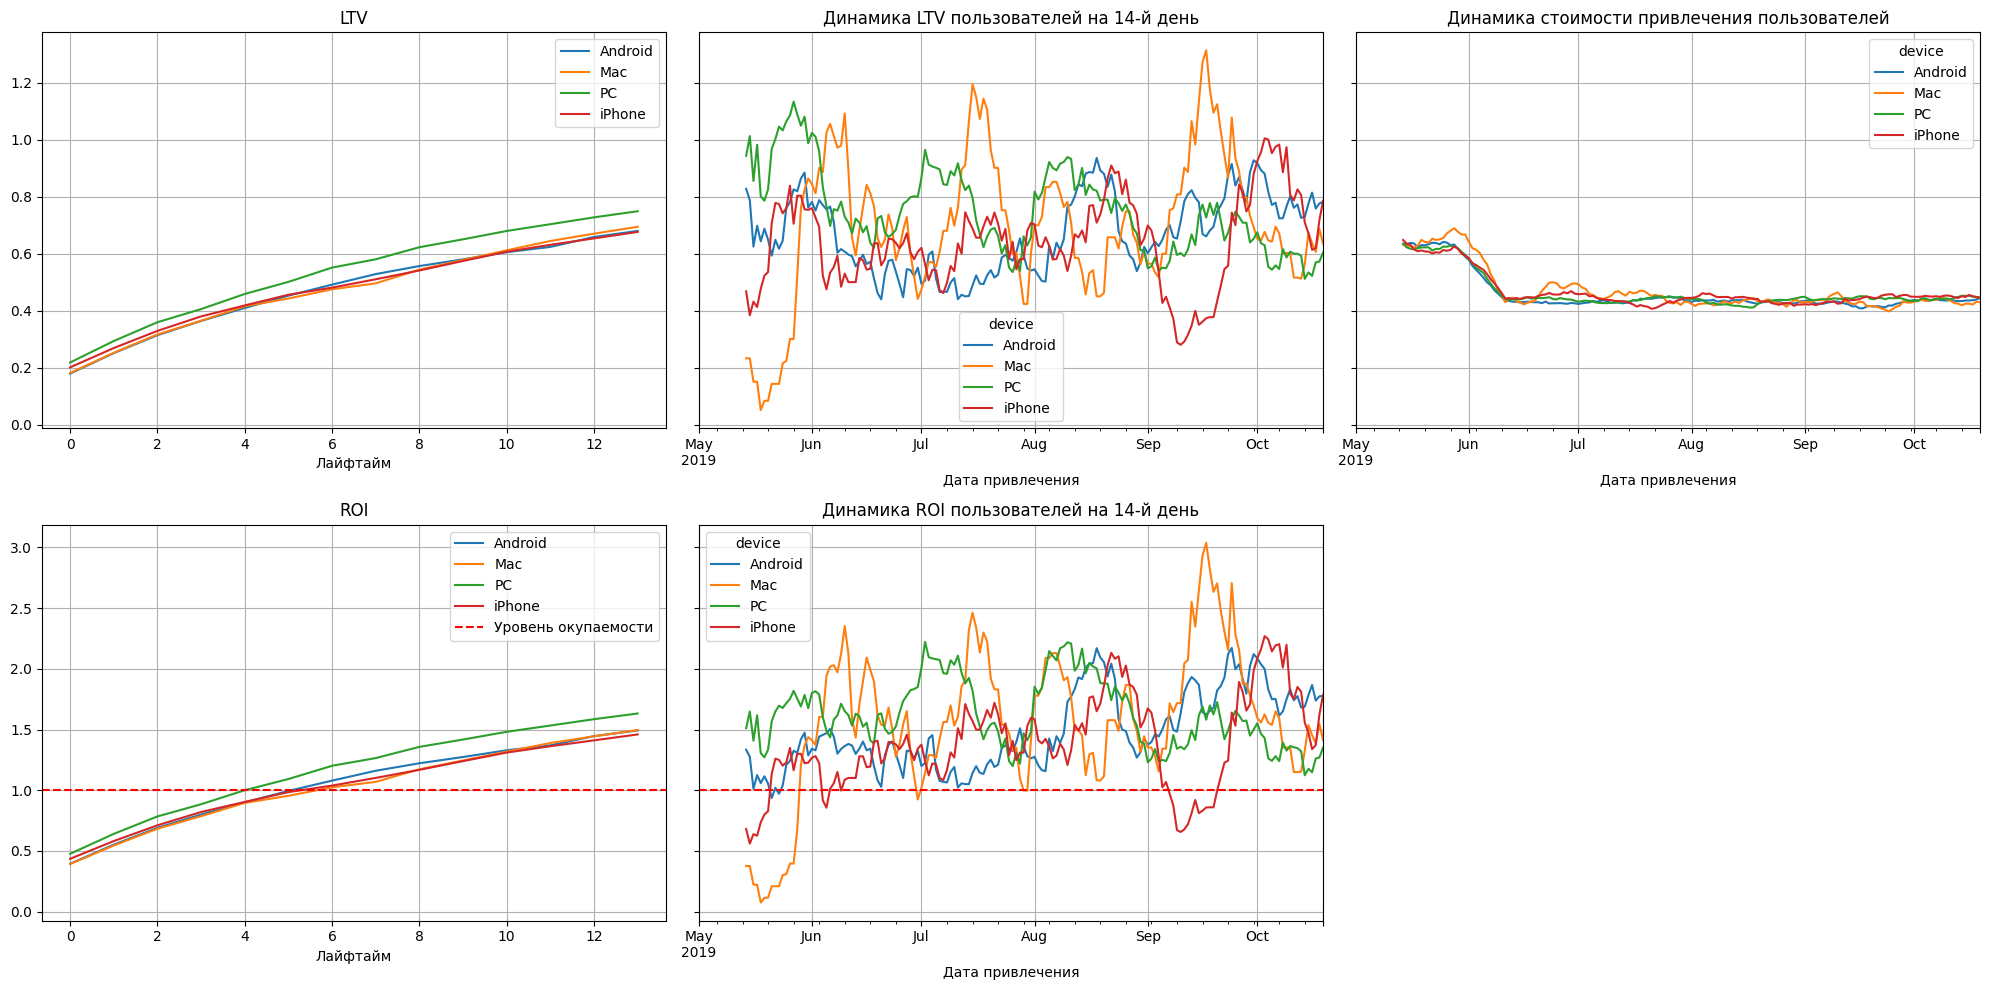

In [38]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=['device']
)
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

**Вывод:** Проанализировав окупаемость рекламы с разбивкой по устройствам без региона United States, можно сказать, что все устройства выходят на окупаемость. А значит можно работать с устройствами  iPhone и Mac за пределами региона United States.

### Напишите выводы

- Выделите причины неэффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.

**Вывод:**
* Основная причина неэффективности привлечения пользователей, это выбор каналов, устройств и стран с резко растущим увеличением стоимости привлечения пользователей.
* Необходимо сократить расходы на привлечение пользователей в United States. Так же сократить расходы на привлечение клиентов с устройствами iPhone и Mac. Избавиться от каналов FaceBoom, AdNonSense и особенно TipTop. Нарастить привлечение пользователей с платформой PC, а также увеличить взаимодействие с каналами YRabbit, MediaTornado и особенно lambdaMediaAds, так как данный канал имеет одну из лучших долю платящих клиентов. Усилить привлечение пользователей в регионе Germany, так как данный регион показывает хорошую окупаемость и имеет одну из лучших долей платящих клиентов.